## Problem Set 4: Runge-Kutta ODE solver and working with classes

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Problem 1

##### Define class for equation of state, constants, and initial conditions:

In [2]:
# constants
G = 6.67430 * 10**(-11) #Gravitional constant in N*m^3/Kg^2

# initial conditions
P_c = 10**12
m_0 = 0
dr = 1000 # radial steps in meters
R_earth = 6378100 #radius of Earth in meters
M_earth = 5.9722 * 10**24 #Kg

class RHO:
    """
    Equation of State for DENSITY related to PRESSURE 
    
    Methods:
        constructor (rho0): set initial density
        value(P): pressure - compute density as a function of P
        
    Parameters:
        rho0: initial density
        c: constant
        n: constant
    """   
    def __init__(self, rho0, c, n):
        self.rho0, self.c, self.n = rho0, c, n
        
    def value(self, P):
        rho0, c, n = self.rho0, self.c, self.n
        rho = rho0 + (c * max(P,0)**n)
        return rho 

In [3]:
# Define coupled differential equations #
def dPdr(P, m, r): 
    return (-G * m * rho.value(P))/r**2

def dmdr(P, m, r):
    return 4 * math.pi * rho.value(P) * r**2

# Define Runge Kutta method
def RK4_step(P, m, r, dr):
    '''
    Parameters:
    P: pressure
    m: mass
    r: radius
    dr: 1000 m - radial step
    returns pressure, mass, and radius
        '''
    k1 = dr * dPdr(P, m, r)
    l1 = dr * dmdr(P, m, r)
    k2 = dr * dPdr(P + (k1 * 0.5), m + (l1 * 0.5), r + (dr * 0.5))
    l2 = dr * dmdr(P + (k1 * 0.5), m + (l1 * 0.5), r + (dr * 0.5))
    k3 = dr * dPdr(P + (k2 * 0.5), m + (l2 * 0.5), r + (dr * 0.5))
    l3 = dr * dmdr(P + (k2 * 0.5), m + (l2 * 0.5), r + (dr * 0.5))
    k4 = dr * dPdr(P + k3, m + l3, r + (dr * 0.5))
    l4 = dr * dmdr(P + k3, m + l3, r + (dr * 0.5))
        
    P = P + (k1 + 2*k2 + 2*k3 + k4)/6
    m = m + (l1 + 2*l2 + 2*l3 + l4)/6
            
    return (P, m, r)

In [4]:
rho = RHO(8300.0, 0.00349, 0.528)

P = P_c
m = m_0
r = dr

Ppoints, mpoints, rpoints = [], [], []

while P >= 0:
    (P, m, r) = RK4_step(P, m, r, dr)
    r = r + dr
    Ppoints.append(P)
    mpoints.append(m)
    rpoints.append(r)

##### Plot Pressure vs Radius: Planet composed of Fe

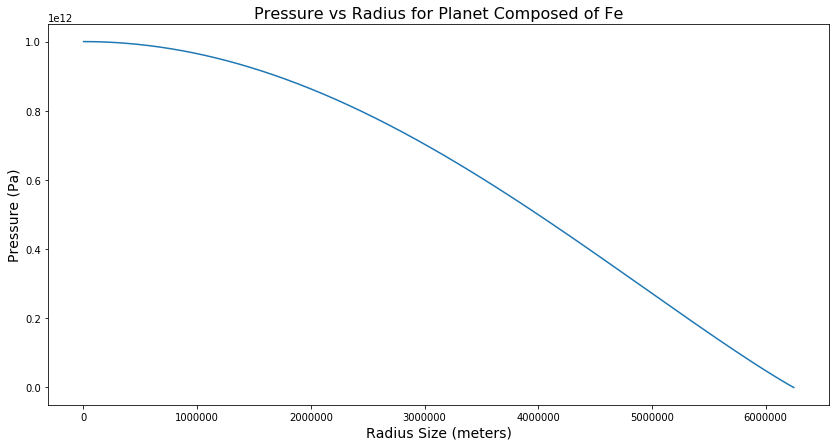

In [47]:
fig1, ax = plt.subplots(figsize = (14, 7))

ax.errorbar(rpoints, Ppoints,
            fmt = '-', ecolor = 'k', capsize = 1)

ax.set_xlabel('Radius Size (meters)', fontsize = 14)
ax.set_ylabel('Pressure (Pa)', fontsize = 14)
#plt.xticks(np.arange(dr, max(ppoints), 10000))
ax.set_title('Pressure vs Radius for Planet Composed of Fe', 
             fontsize = 16)

plt.show()

##### Plot Density vs Radius: Planet composed of Fe

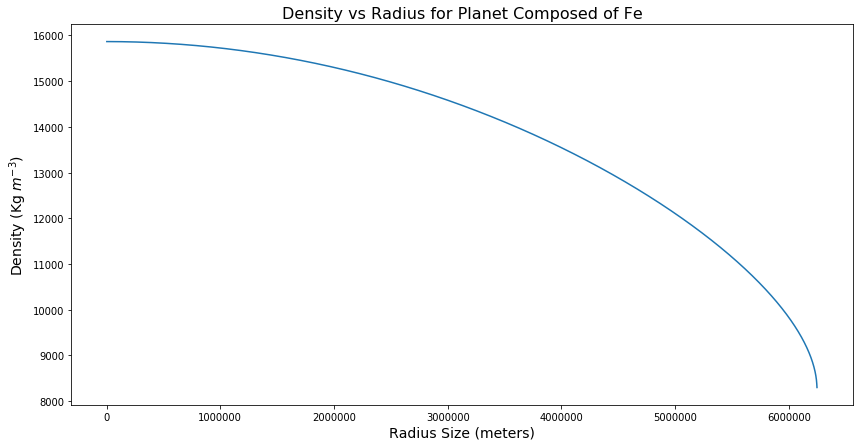

In [6]:
P = np.array(Ppoints)

density = []

for i in P:
    density.append(rho.value(i))

fig2, ax2 = plt.subplots(figsize = (14, 7))

ax2.errorbar(rpoints, density,
            fmt = '-')

ax2.set_xlabel('Radius Size (meters)', fontsize = 14)
ax2.set_ylabel('Density (Kg $m^{-3}$)', fontsize = 14)
#plt.xticks(np.arange(dr, max(ppoints), 10000))
ax2.set_title('Density vs Radius for Planet Composed of Fe', 
             fontsize = 16)

plt.show()

##### Found Mass and Radius of Iron Planet Compared to Earth

In [7]:
print('Radius of Fe planet is', rpoints[-1]/R_earth, 'of Earth\'s Radius')


Radius of Fe planet is 0.9794452893494928 of Earth's Radius


In [8]:
print('Mass of Fe planet is', mpoints[-1]/M_earth, 'Earth Masses')

Mass of Fe planet is 2.082899536387568 Earth Masses


## Problem 2: Range of Central Pressures

In [9]:
# Pc = 10^(10 - 16) for Fe planet

rho = RHO(8300.0, 0.00349, 0.528)

radii, mass = [], []

for i in range(8,17):
    P = 10**i
    m = 0
    r = dr
    while P >= 0:
        (P, m, r) = RK4_step(P, m, r, dr)
        r = r + dr

    mass.append(m)
    radii.append(r)
    
masses1 = np.array(mass)/M_earth
radii1 = np.array(radii)/R_earth

In [11]:
# Pc = 10.5^(10 - 16) for Fe planet

rho = RHO(8300.0, 0.00349, 0.528)

radii2, mass2 = [], []

for i in range(8,17):
    P = 10.5**i
    m = 0
    r = dr
    while P >= 0:
        (P, m, r) = RK4_step(P, m, r, dr)
        r = r + dr

    mass2.append(m)
    radii2.append(r)
    
masses2 = np.array(mass2)/M_earth
radii2 = np.array(radii2)/R_earth

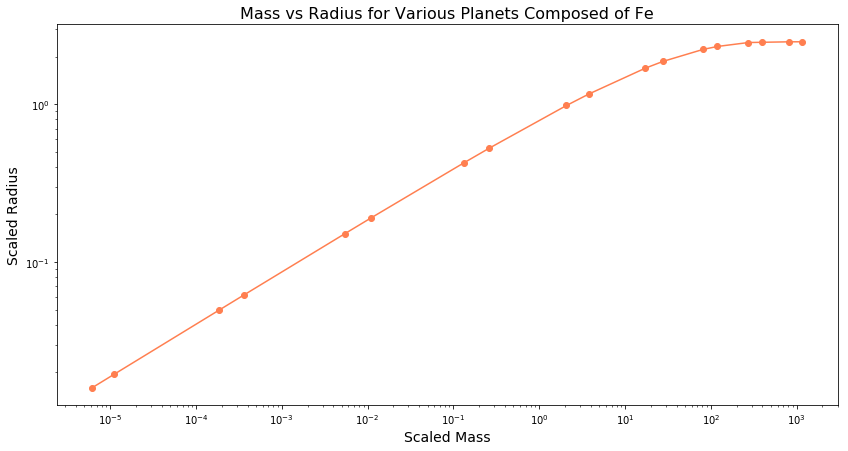

In [35]:
# Plot Mass vs Radius 

MASS = np.unique(np.concatenate((masses1,masses2)))
RADII = np.unique(np.concatenate((radii1,radii2)))

fig3, ax3 = plt.subplots(figsize = (14, 7))

ax3.set_xscale("log")
ax3.set_xlabel('Scaled Mass', fontsize = 14)
ax3.set_yscale("log")
ax3.set_ylabel('Scaled Radius' , fontsize = 14)

ax3.errorbar(MASS, RADII, fmt='-o', color = 'coral', label = 'Fe: n = 0.528')

ax3.set_title('Mass vs Radius for Various Planets Composed of Fe', 
             fontsize = 16)

plt.show()

Start to notice a plateau for higher masses on graph above. Lower masses seem more reliable.

## Problem 3: Multiple elements, Planets, and Exoplanets

##### MgSi03

In [13]:
# Varying Pressure 10^(10 - 16) for Planet composed of MgSi03

rho = RHO(4100.00, 0.00161, 0.541)

radiiMG, massMG = [], []

for i in range(8,17):
    P = 10**i
    m = 0
    r = dr
    while P >= 0:
        (P, m, r) = RK4_step(P, m, r, dr)
        r = r + dr

    massMG.append(m)
    radiiMG.append(r)
    
massesMG = np.array(massMG)/M_earth
radiiMG = np.array(radiiMG)/R_earth

In [14]:
# Varying Pressure 10.5^(10 - 16) for Planet composed of MgSiO3

rho = RHO(4100.00, 0.00161, 0.541)

radiiMG2, massMG2 = [], []

for i in range(8,17):
    P = 10.5**i
    m = 0
    r = dr
    while P >= 0:
        (P, m, r) = RK4_step(P, m, r, dr)
        r = r + dr

    massMG2.append(m)
    radiiMG2.append(r)
    
massesMG2 = np.array(massMG2)/M_earth
radiiMG2 = np.array(radiiMG2)/R_earth

# Concatenate both arrays
MASSMG = np.unique(np.concatenate((massesMG,massesMG2)))
RADIIMG = np.unique(np.concatenate((radiiMG,radiiMG2)))

##### H2O

In [16]:
# Varying Pressure 10^(10 - 16) for Planet composed of H2O

rho = RHO(1460.00, 0.00311, 0.513)

radiiH20, massH20 = [], []

for i in range(8,17):
    P = 10**i
    m = 0
    r = dr
    while P >= 0:
        (P, m, r) = RK4_step(P, m, r, dr)
        r = r + dr

    massH20.append(m)
    radiiH20.append(r)
    
massesH20 = np.array(massH20)/M_earth
radiiH20 = np.array(radiiH20)/R_earth

In [21]:
# Varying Pressure 10.5^(10 - 16) for Planet composed of H20

rho = RHO(1460.00, 0.00311, 0.513)

radiiH202, massH202 = [], []

for i in range(8,17):
    P = (10.5)**i
    m = 0
    r = dr
    while P >= 0:
        (P, m, r) = RK4_step(P, m, r, dr)
        r = r + dr

    massH202.append(m)
    radiiH202.append(r)
    
massesH202 = np.array(massH202)/M_earth
radiiH202 = np.array(radiiH202)/R_earth

MASSH20 = np.unique(np.concatenate((massesH20,massesH202)))
RADIIH20 = np.unique(np.concatenate((radiiH20,radiiH202)))

##### Plot of Mass vs Radius for Various Materials while Varying Central Pressures

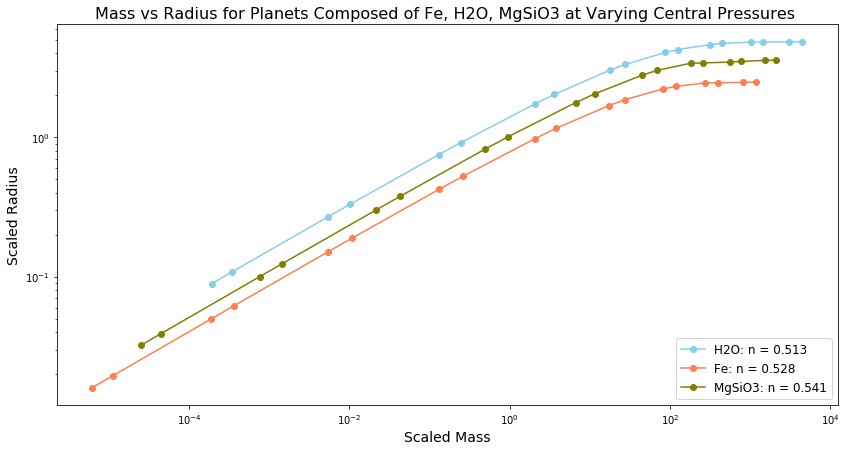

In [34]:
fig4, ax4 = plt.subplots(figsize = (14, 7))

ax4.set_xscale("log")
ax4.set_xlabel('Scaled Mass', fontsize = 14)
ax4.set_yscale("log")
ax4.set_ylabel('Scaled Radius' , fontsize = 14)

ax4.errorbar(MASSH20, RADIIH20, fmt='-o', color = 'skyblue', label = 'H2O: n = 0.513')

ax4.errorbar(MASS, RADII, fmt='-o', color = 'coral', label = 'Fe: n = 0.528')

ax4.errorbar(MASSMG, RADIIMG, fmt='-o', color = 'olive', label = 'MgSiO3: n = 0.541')


ax4.set_title('Mass vs Radius for Planets Composed of Fe, H2O, MgSiO3 at Varying Central Pressures ', 
             fontsize = 16)

ax4.legend(loc = 4, fontsize = 12)

plt.show()

All curves plateau at high mass. ^^^

###### Plot of Mass vs Radius for Planets and Exoplanets

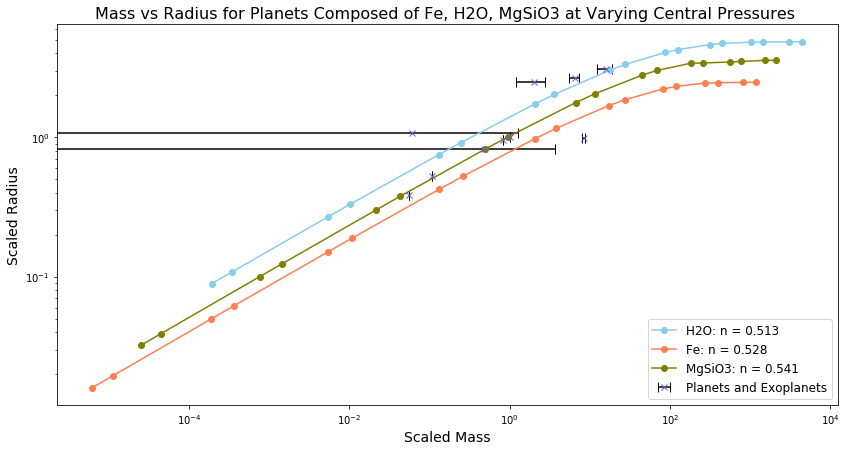

In [45]:
# Terrestrial Planets (mass, radius) Earth = 1, 1, 0.0001; Venus = 0.815, 0.949, ; Mercury = 0.0553, 0.383; 
    #Mars = 0.107, 0.532
# Exoplanets: Keppler 11f = (2.00, 2.49, 0.80, 0.06), KOI-1612.01 = (0.48, 0.82, 3.2, 0.03), 
    # GJ 1214 = (6.45, 2.65, 0.91, 0.09), 55 Cnc e = (8.38, 0.990, 0.39, 0.08), Kepler-407b = (0.06, 1.07, 1.20, 0.02),
    # Keppler 20 c = (15.73, 3.07, 3.31, 0.25)

MASSPLANETS = (0.0553, 0.06, 0.107, 0.48, 0.815, 1, 2.00, 6.45, 8.38, 15.73)
RADIIPLANETS = (0.383, 1.07, 0.532, 0.82, 0.949, 1, 2.49, 2.65, 0.99, 3.07)
MASSERROR = (0, 1.20, 0, 3.2, 0, 0.0001, 0.80, 0.91, 0.39, 3.31)
RADIIERROR = ()

fig, ax = plt.subplots(figsize = (14, 7))

ax.set_xscale("log")
#plt.xticks((10**-1, 10**0, 10**1, 10**2, 10**3, 10**4))
ax.set_xlabel('Scaled Mass', fontsize = 14)
ax.set_yscale("log")
ax.set_ylabel('Scaled Radius' , fontsize = 14)

ax.errorbar(MASSH20, RADIIH20, fmt = '-o', color = 'skyblue', label = 'H2O: n = 0.513')

ax.errorbar(MASS, RADII, fmt = '-o', color = 'coral', label = 'Fe: n = 0.528')

ax.errorbar(MASSMG, RADIIMG, fmt = '-o', color = 'olive', label = 'MgSiO3: n = 0.541')

ax.errorbar(MASSPLANETS, RADIIPLANETS, xerr = MASSERROR, fmt = 'x', linestyle = 'None', ecolor = 'k', capsize = 5, color = 'slateblue', 
            label = 'Planets and Exoplanets')

ax.set_title('Mass vs Radius for Planets Composed of Fe, H2O, MgSiO3 at Varying Central Pressures ', 
             fontsize = 16)

ax.legend(loc = 4, fontsize = 12)

plt.show()

I'm not sure if I understood how to plot correctly (the error looks crazy in log scale), but it appears that Mercury, Mars, Venus and Earth correspond to being comprised of MgSiO3; KOI-1612.01 does as well - but the error in mass makes it difficult to tell (with it's associated error it falls in region for all 3 materials).

GJ 1214, Keppler-20 c could be comprised of H2O

Keppler-407 b, Keppler-11 f difficult to tell, but as Keppler-11 f has smaller error in mass, it doesn't correpond well to any of three materials whereas Keppler-407 b could possibly be H20 or MgSiO3

It was surprisngly difficult to find associated error in mass for the planets (except for Earth)